In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pop = np.array([100,200,300])
dc = np.array([[0.01,0.02,0.03],
               [0.04,0.05,0.06],
               [0.01,0.02,0.03]])
gc = 0.01
K = 25000
cm = np.array([[0.2,0.2,0.6],
               [0.1,0.6,0.3],
               [0.01,0.3,0.69]])

# b(1, n+1) = b(1, n) + g1 * b(1, n) * (1 - (b(1, n)*cm11 + b(2, n) * cm12 + b(3, n)*cm13)/K )
# sum(cm) = nb
# the above equation implemented below in three possible ways for the update in population at any time step.
for i in range(3):
    print("b",i+1,"pop",gc*pop[i]*(1 - (pop[0]*cm[i,0] + pop[1]*cm[i,1] + pop[2]*cm[i,2])/K))

print("b1 updated pop", gc*pop[0]*(1 - (pop[0]*dc[0,0] + pop[1]*dc[0,1] + pop[2]*dc[0,2])/K))
print("b2 updated pop",gc*pop[1]*(1 - (pop[0]*dc[1,0] + pop[1]*dc[1,1] + pop[2]*dc[1,2])/K))
print("b3 updated pop", gc*pop[2]*(1 - (pop[0]*dc[2,0] + pop[1]*dc[2,1] + pop[2]*dc[2,2])/K))

pop*gc - pop*gc*(np.sum(pop*dc,axis = 1)/K)



Text(0.5, 1.0, 'total population = 19814, Cap = 25000\nGrowth = 0.10 Decay = 0.01 [for all interactions]\nPopulation Legend : bacterium(initial,final pop)\nNutrient Legend : bacterium(incoming nutrient probability)')

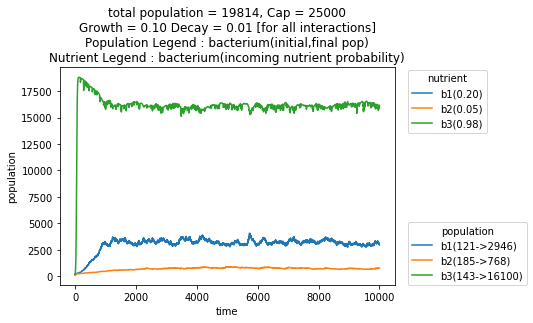

In [87]:

nb = 3
# GROWTH AND DECAY FACTORS
# dc = np.array([[0.01,0.02,0.03],
#                [0.01,0.1,0.01],
#                [0.01,0.1,0.03]])
dr = 0.01
gr = 0.1
dc = np.ones((nb,nb))*dr
dc = np.repeat([dr],nb)
gc = np.repeat([gr],nb)

# INITIAL POPULATION OF BACTERIUM
pop = np.random.randint(100,200,size = nb)
init_pop = pop

K = 25000
iterations = 10000
final = np.zeros((iterations,nb))
growth_factor = np.zeros((iterations,nb))

# initialise nutrients probabilities for each bacterium, first row = probability of 0 nutrients for bacterium 1, probability of nutrients coming (1) for bacterium 1. 
n = []
prob = np.array([
                [0.22,0.78],
                [0.28,0.72],
                [0.4,0.6],
                [0.8,0.2],
                [0.95,0.05],
                [0.02,0.98],
                [0.1,0.9],
                [0.5,0.5],              
                [0.7,0.3],
                [0.6,0.4]
                ])

# prob = np.tile(np.array([0,1]),(nb,1))   # nutrient either comes or not. 

for i in range(nb):
    n.append(np.random.choice([0,1],(iterations),p = prob[i+3]))
nutrients = np.array(n).T

lb1 = ["b{0}({1:.2f})"
    .format(i+1,prob[i+3,1]) for i in range(nb)]


# [n1, n2, n3] >> [[n1.b1, n2.b1, n3.b1]  >> squash all cols >> [b1, b2, b3]
#                 [n1.b2, n2.b2, n3.b2]
    #             [n1.b3, n2.b3, n3.b3]]
# n1 = 100; b1,b2,b3 = [100,200,300] -> n1 [0.16, 0.34, 0.5] -> [16,33,50]
m = np.array([[0.16, 0.01, -0.95],
              [0.33, 0.19, 0.01],
              [0.5, 0.80, 0.04]])
 
# imagine - n1 = fat, n2 = carbs, n3 = protein
# n =[100, 200, 300]
# run simulation
for i in range(iterations):
    nut = nutrients[i]

    
    # pop = pop + pop*gc*nut*(1- np.sum(pop,axis = 0)/K) - (1-nut)*(pop*dc)

    # nut = np.sum(n*m,axis=1)
    gf = (1 + gc*nut*(1- np.sum(pop)/K) - dc*(nb*pop/K))

    # death rate versus competition (which is basically modifying death by other factors?)
    
    pop = pop*(1 + gc*nut*(1- np.sum(pop)/K) - dc*nb*pop/K)

    final[i] = pop
    growth_factor[i] = gf         

# plot the growth evolution
lb = ["b{0}({1}->{2:.0f})"
    .format(i+1,init_pop[i],pop[i]) for i in range(nb)]

lines = plt.plot(final)
l1 = plt.legend(lines,lb1, loc=(1.04,0.7), title="nutrient")
plt.gca().add_artist(l1)

plt.legend(lb,loc=(1.04,0),title = "population")
plt.xlabel("time")
plt.ylabel("population")
plt.title("""total population = {0:.0f}, Cap = {3}
Growth = {1:.2f} Decay = {2:.2f} [for all interactions]
Population Legend : bacterium(initial,final pop)
Nutrient Legend : bacterium(incoming nutrient probability)""".
format(final[-1].sum(),gr,dr,K))

# plt.plot(growth_factor)


moving on ... to multiple interactions between nutrient and bacterium

In [90]:
nutrients

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [63]:
print("""
n = {0}
m = {1}
n*m  = {2}
sum = {7}

n = {3}
m = {4}
n*m  = {5}
sum = {6}
""".format(n[:,np.newaxis],m, n[:,np.newaxis]*m
,n, m, n*m, np.sum(n*m, axis = 1),np.sum(n[:,np.newaxis]*m,axis = 0)))


n = [[0]
 [0]
 [1]]
m = [[0.2  0.01 0.95]
 [0.79 0.19 0.01]
 [0.01 0.8  0.04]]
n*m  = [[0.   0.   0.  ]
 [0.   0.   0.  ]
 [0.01 0.8  0.04]]
sum = [0.01 0.8  0.04]

n = [0 0 1]
m = [[0.2  0.01 0.95]
 [0.79 0.19 0.01]
 [0.01 0.8  0.04]]
n*m  = [[0.   0.   0.95]
 [0.   0.   0.01]
 [0.   0.   0.04]]
sum = [0.95 0.01 0.04]



In [ ]:

nb = 2
# GROWTH AND DECAY FACTORS
# dc = np.array([[0.01,0.02,0.03],
#                [0.01,0.1,0.01],
#                [0.01,0.1,0.03]])
dr = 0.01
gr = 0.04
dc = np.repeat([dr],nb)

gc = np.repeat([gr],nb)

# INITIAL POPULATION OF BACTERIUM
pop = np.random.randint(100,200,size = nb)
init_pop = pop

K = 25000
iterations = 5000
final = np.zeros((iterations,nb))
growth_factor = np.zeros((iterations,nb))

# initialise nutrients probabilities for each bacterium, first row = probability of 0 nutrients for bacterium 1, probability of nutrients coming (1) for bacterium 1. 
n = []
prob = np.array([[0.6,0.4],
                [0.02,0.98],
                [0.1,0.9],
                [0.7,0.3],
                [0.8,0.2],
                [0.95,0.05],
                [0.5,0.5]              
                ])

# prob = np.tile(np.array([0,1]),(nb,1))   # nutrient either comes or not. 

for i in range(nb):
    n.append(np.random.choice([0,1],(iterations),p = prob[i]))
nutrients = np.array(n).T
lb1 = ["b{0}({1:.2f})"
    .format(i+1,prob[i,1]) for i in range(nb)]


# run simulation
for i in range(iterations):
    nut = nutrients[i]
    # pop = pop + pop*gc*nut*(1- np.sum(pop,axis = 0)/K) - (1-nut)*(pop*dc)
    gf = (1 + gc*nut*(1- np.sum(pop)/K) - dc*(nb*pop/K))
    pop = pop*(1 + gc*nut*(1- np.sum(pop)/K) - dc*(nb*pop/K))
    final[i] = pop
    growth_factor[i] = gf         

# plot the growth evolution
lb = ["b{0}({1}->{2:.0f})"
    .format(i+1,init_pop[i],pop[i]) for i in range(nb)]

lines = plt.plot(final)
l1 = plt.legend(lines,lb1, loc=(1.04,0.7), title="nutrient")
plt.gca().add_artist(l1)

plt.legend(lb,loc=(1.04,0),title = "population")
plt.xlabel("time")
plt.ylabel("population")
plt.title("""total population = {0:.0f}, Cap = {3}
Growth = {1:.2f} Decay = {2:.2f} [for all interactions]
Population Legend : bacterium(initial,final pop)
Nutrient Legend : bacterium(incoming nutrient probability)""".
format(final[-1].sum(),gr,dr,K))

# plt.plot(growth_factor)


# below some random code to understand the behavior of multivariate normal distributions.


In [ ]:
mean = [0,0,0]
cov = [[10, 0, 0], [0, 1, 0], [0, 0, 1]] 

x,y,z  = np.random.multivariate_normal(mean, cov,5000).T
plt.plot(x,y,'x')
plt.
plt.axis('equal')


In [ ]:
mean = np.array([0,10,100])
cov = np.array([
    [1,0,0],[0,50,0],[0,0,1]
])
x,y,z = np.random.multivariate_normal(mean, cov,5000).T

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y,z, c=z, cmap='Greens')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
x = np.linspace(-1, 3, 5)
y = np.linspace(0, 4, 5)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu = np.array([1, 2])
cov = np.array([[.5, .25],[.25, .5]])
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, Z)


In [ ]:
x, y = np.mgrid[1:6.02:.05, 3:9.02:.05]
x